# House Price Prediction Project

Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.

## 1.Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv(r'C:\Users\Hi\Downloads\Project-Housing--2---1-\Project-Housing_splitted\train.csv')
df2=pd.read_csv(r'C:\Users\Hi\Downloads\Project-Housing--2---1-\Project-Housing_splitted\test.csv')

In [3]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [4]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [5]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

About columns:

SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet


PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
for i in df1.columns:
  print(df1[i].value_counts())
  print("________________________________________")

1       1
946     1
964     1
963     1
962     1
       ..
480     1
479     1
478     1
477     1
1460    1
Name: Id, Length: 1168, dtype: int64
________________________________________
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
________________________________________
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
________________________________________
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
141.0      1
144.0      1
111.0      1
39.0       1
46.0       1
Name: LotFrontage, Length: 106, dtype: int64
________________________________________
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64
____________________________

<AxesSubplot:>

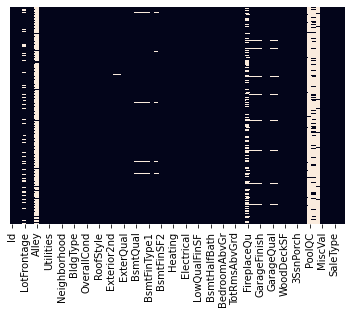

In [9]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

In [10]:
df1.shape

(1168, 81)

In [11]:
df1.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrType         7
MasVnrArea         7
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
dtype: int64

In [12]:
# cloumns of 'Alley', 'MiscFeature', 'PoolQC', 'Fence' got a large number of missing values, 
# so its better to drop these columns
df1 = df1.drop(columns=['Alley', 'MiscFeature', 'PoolQC', 'Fence'])
df2 = df2.drop(columns=['Alley', 'MiscFeature', 'PoolQC', 'Fence'])

In [13]:
df1['LotFrontage'].fillna(df1['LotFrontage'].median(),inplace=True)
df1['MasVnrArea'].fillna(df1['MasVnrArea'].median(),inplace=True)
df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median(),inplace=True)
df2['LotFrontage'].fillna(df2['LotFrontage'].median(),inplace=True)
df2['MasVnrArea'].fillna(df2['MasVnrArea'].median(),inplace=True)
df2['GarageYrBlt'].fillna(df2['GarageYrBlt'].median(),inplace=True)

In [14]:
list1 = ['BsmtFinType1','BsmtQual','BsmtCond', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'MasVnrType', 'MasVnrArea',
         'BsmtExposure','BsmtFinType2']

for item in list1:
    df1[item] = df1[item].fillna(df1[item].mode()[0])
for item in list1:
    df2[item] = df2[item].fillna(df2[item].mode()[0])

In [15]:
df1.isnull().sum().sort_values(ascending=False).head(25)

Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
HeatingQC        0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
dtype: int64

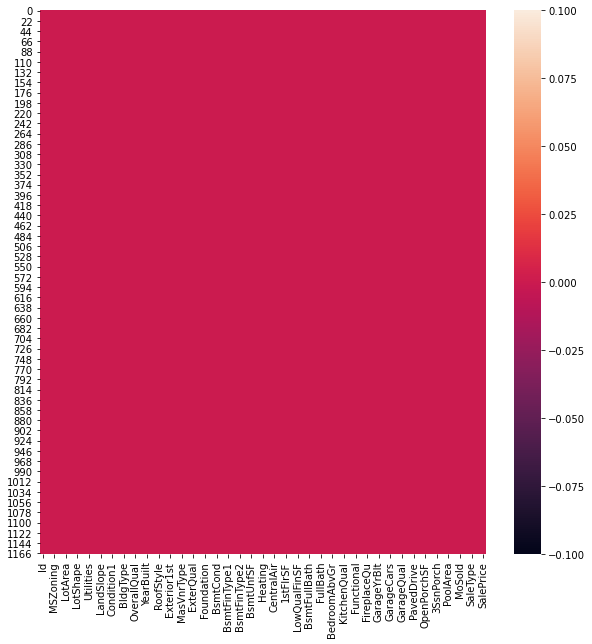

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.isnull());

In [17]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000


In [18]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Correlation

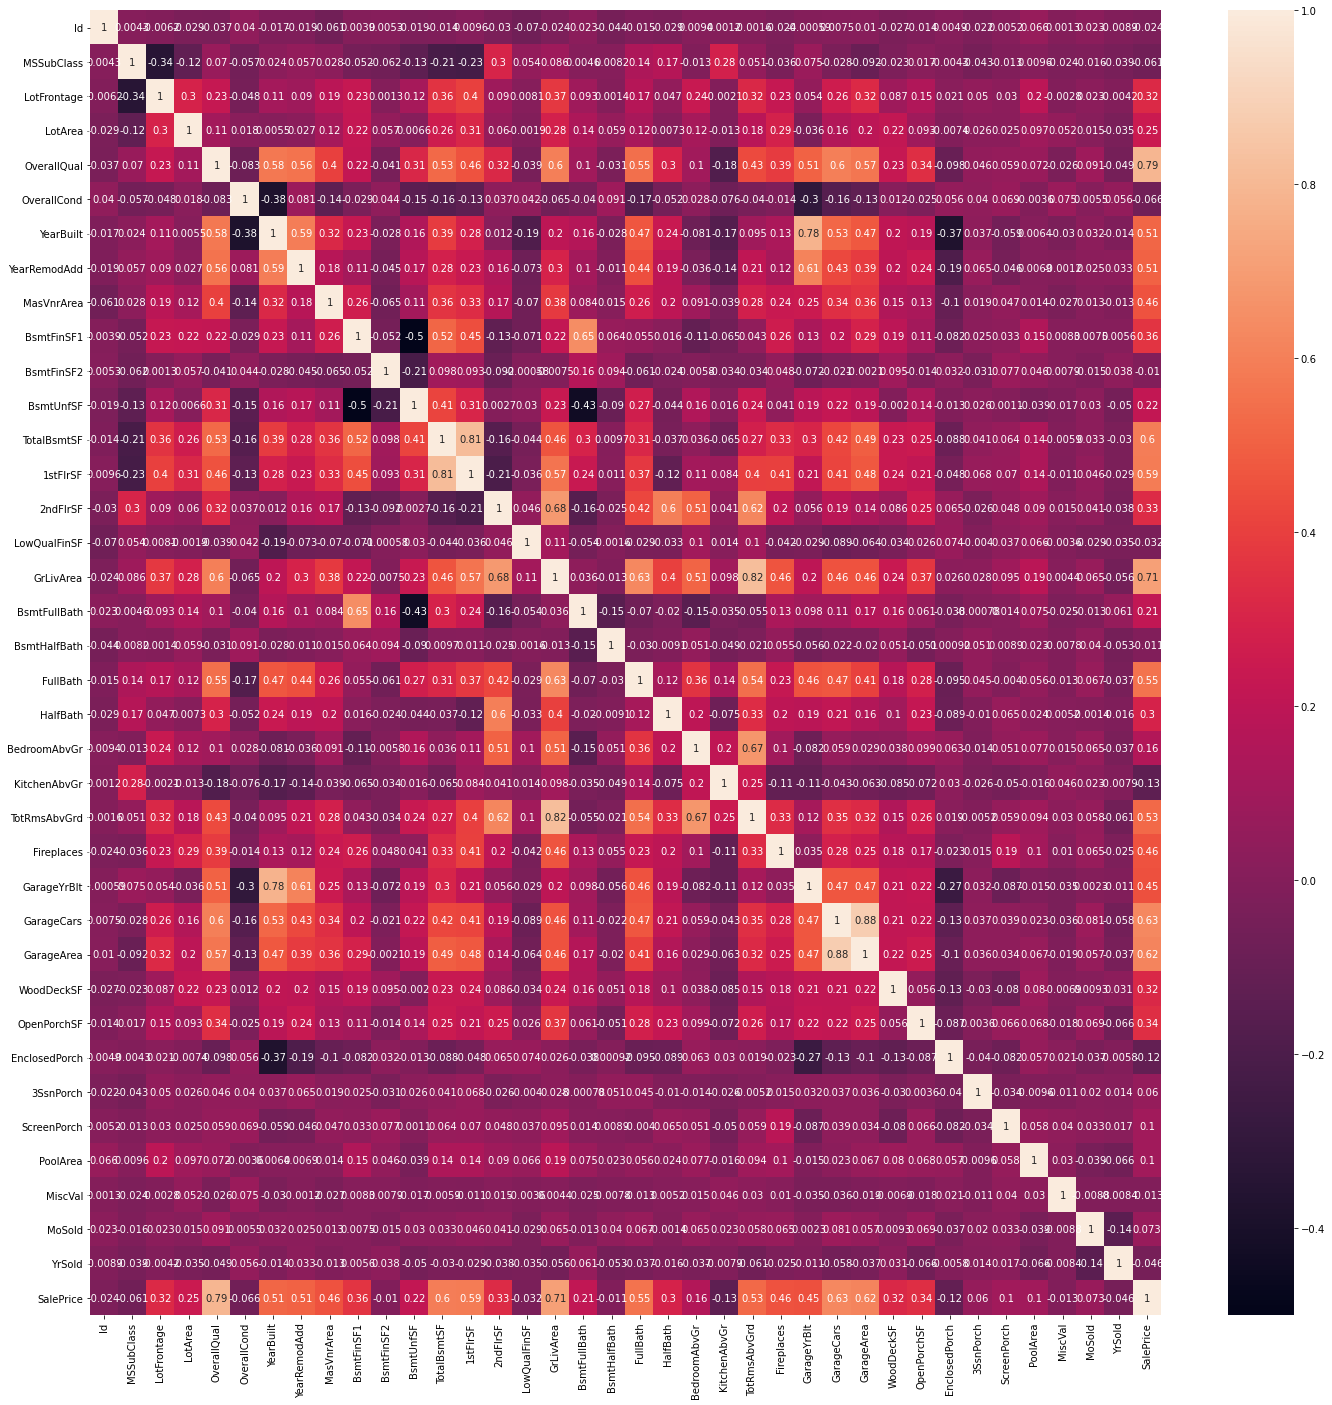

In [19]:
cor=df1.corr()

plt.figure(figsize=(24,24))
sns.heatmap(cor,annot=True)
plt.show()

## 2.Exploratory Data Analysis

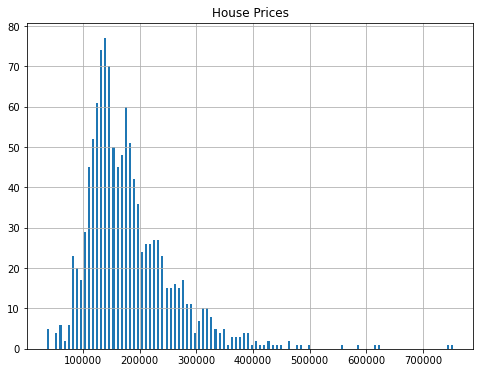

In [20]:
df1['SalePrice'].hist(bins=100,rwidth = 0.5,figsize=(8,6))
plt.title('House Prices')
plt.show()

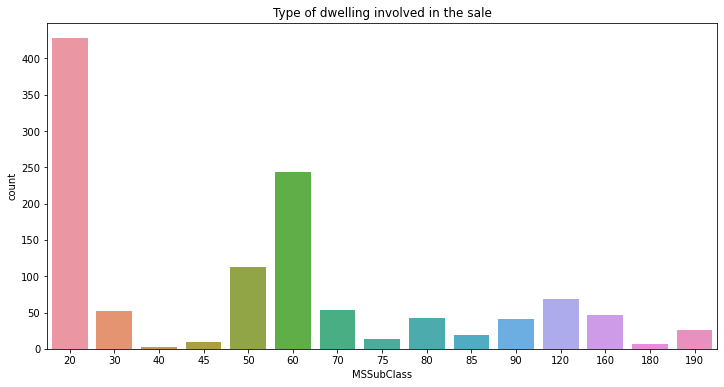

In [21]:
plt.figure(figsize=[12,6])
sns.countplot(df1.MSSubClass)
plt.title('Type of dwelling involved in the sale')
plt.show()

Inference:
    1-STORY 1946 & NEWER ALL STYLES(20)  are high demand for dwelling involved in the sale.
    
    2-STORY 1946 & NEWER(60) second higher demand.
    

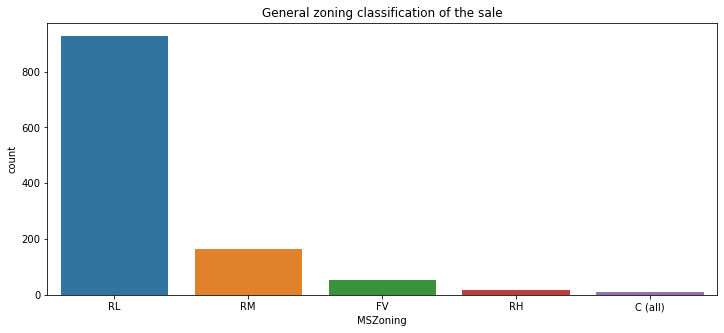

In [22]:
plt.figure(figsize=[12,5])
sns.countplot(df1.MSZoning)
plt.title('General zoning classification of the sale')
plt.show()

Inference:
    
we can see that Residential Low Density zone is make higher demand for sale price.

Commercial zone have least demand for sale price.


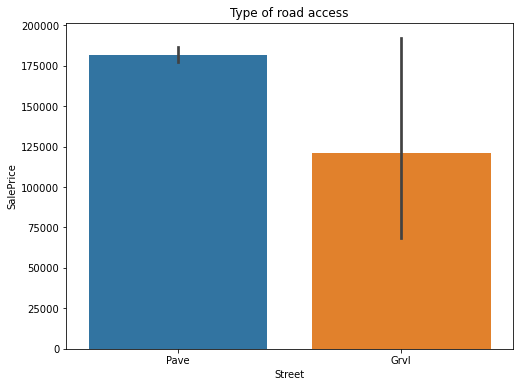

In [23]:
plt.figure(figsize=[8,6])
sns.barplot(x='Street', y='SalePrice', data = df1.sort_values('SalePrice', ascending=False))
plt.title('Type of road access')
plt.show()

Inference:

From this plot observe that the property with the road access of Pave is in more demand and so its price is also high.

<Figure size 864x576 with 0 Axes>

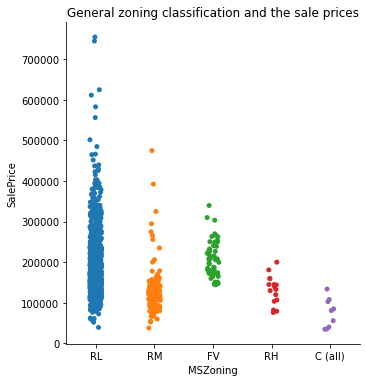

In [24]:
plt.figure(figsize=[12,8])
sns.catplot(x='MSZoning', y='SalePrice',data=df1.sort_values('SalePrice',ascending=False))
plt.title('General zoning classification and the sale prices')
plt.show()

Observations:

For Residential Low Density (RL), the maximum prices are ranging between 50,000 to 4,00,000.

For Floating Village Residential (FV), the maximum prices are ranging between 150000 to 250000.

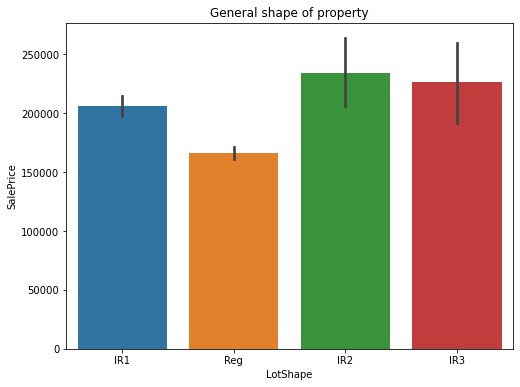

In [25]:
plt.figure(figsize=[8,6])
sns.barplot(x='LotShape', y='SalePrice', data = df1.sort_values('SalePrice', ascending=False))
plt.title('General shape of property')
plt.show()

Inference:
    
Moderately Irregular and Irregular shape  plot are high sale price compare with the Regular shape polt.

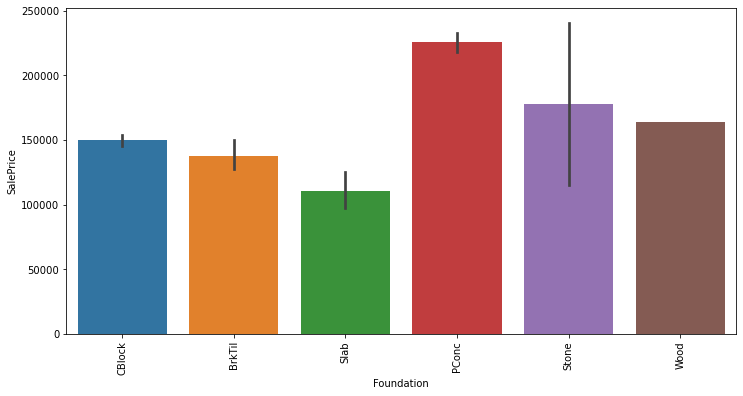

In [26]:
plt.figure(figsize=[12,6])
sns.barplot(x='Foundation', y = 'SalePrice', data=df1.sort_values('SalePrice'))
plt.xticks(rotation=90)
plt.show()

Inference:
    
Poured Contrete foundation have high sale price.

slab foundation have least sale price.
    



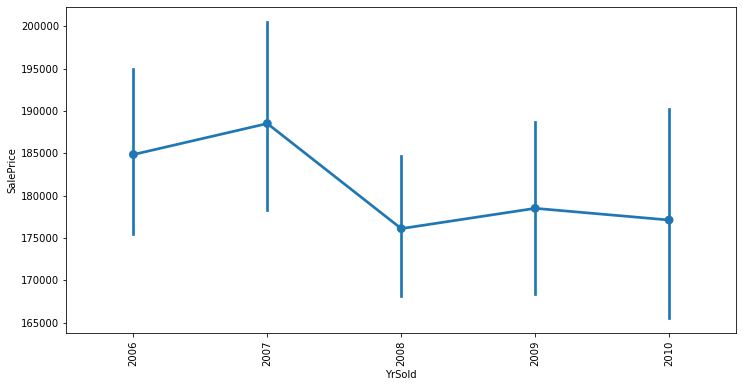

In [27]:
plt.figure(figsize=[12,6])
sns.pointplot(x='YrSold', y = 'SalePrice', data=df1.sort_values('SalePrice'))
plt.xticks(rotation=90)
plt.show()

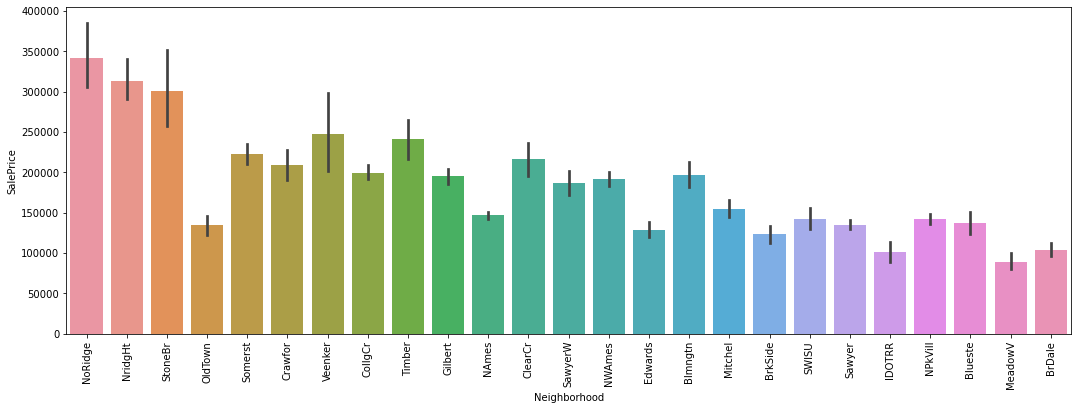

In [28]:
plt.figure(figsize=[18,6])
sns.barplot(x='Neighborhood', y='SalePrice', data= df1.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

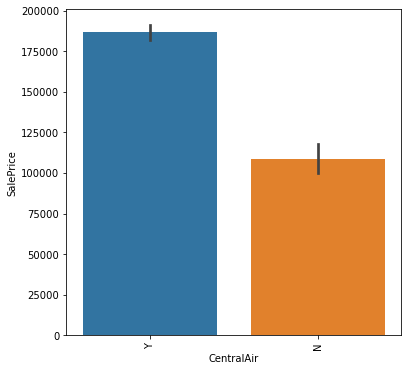

In [29]:
plt.figure(figsize=[6,6])
sns.barplot(x='CentralAir', y='SalePrice', data= df1.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

Houses having the option of central air conditioning have more price.

<Figure size 576x288 with 0 Axes>

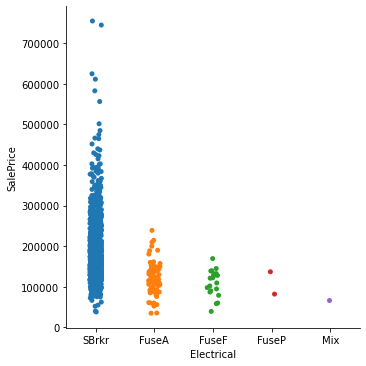

In [30]:
plt.figure(figsize=[8,4])
sns.catplot(x='Electrical', y='SalePrice', data=df1.sort_values('SalePrice', ascending=False))

plt.show()

Inference: 
    
Most of the houses are having the electrical system of standard circuit breakers and romex.

Least of the houses are having the Fuse Box and mostly knob & tube wiring (poor) and mixed.


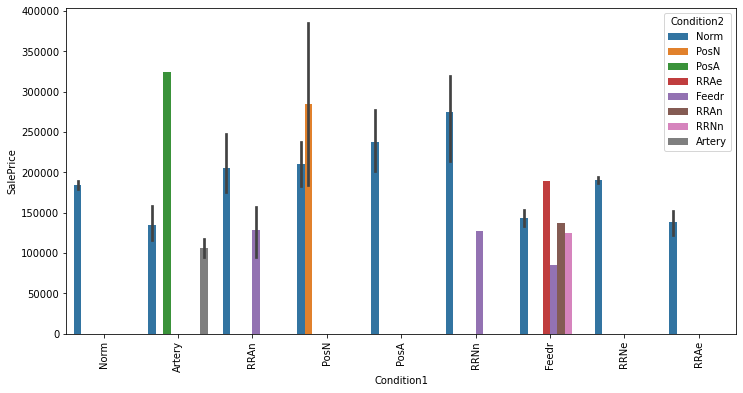

In [31]:
plt.figure(figsize=[12,6])
sns.barplot(x='Condition1', y='SalePrice', hue='Condition2', data=df1.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

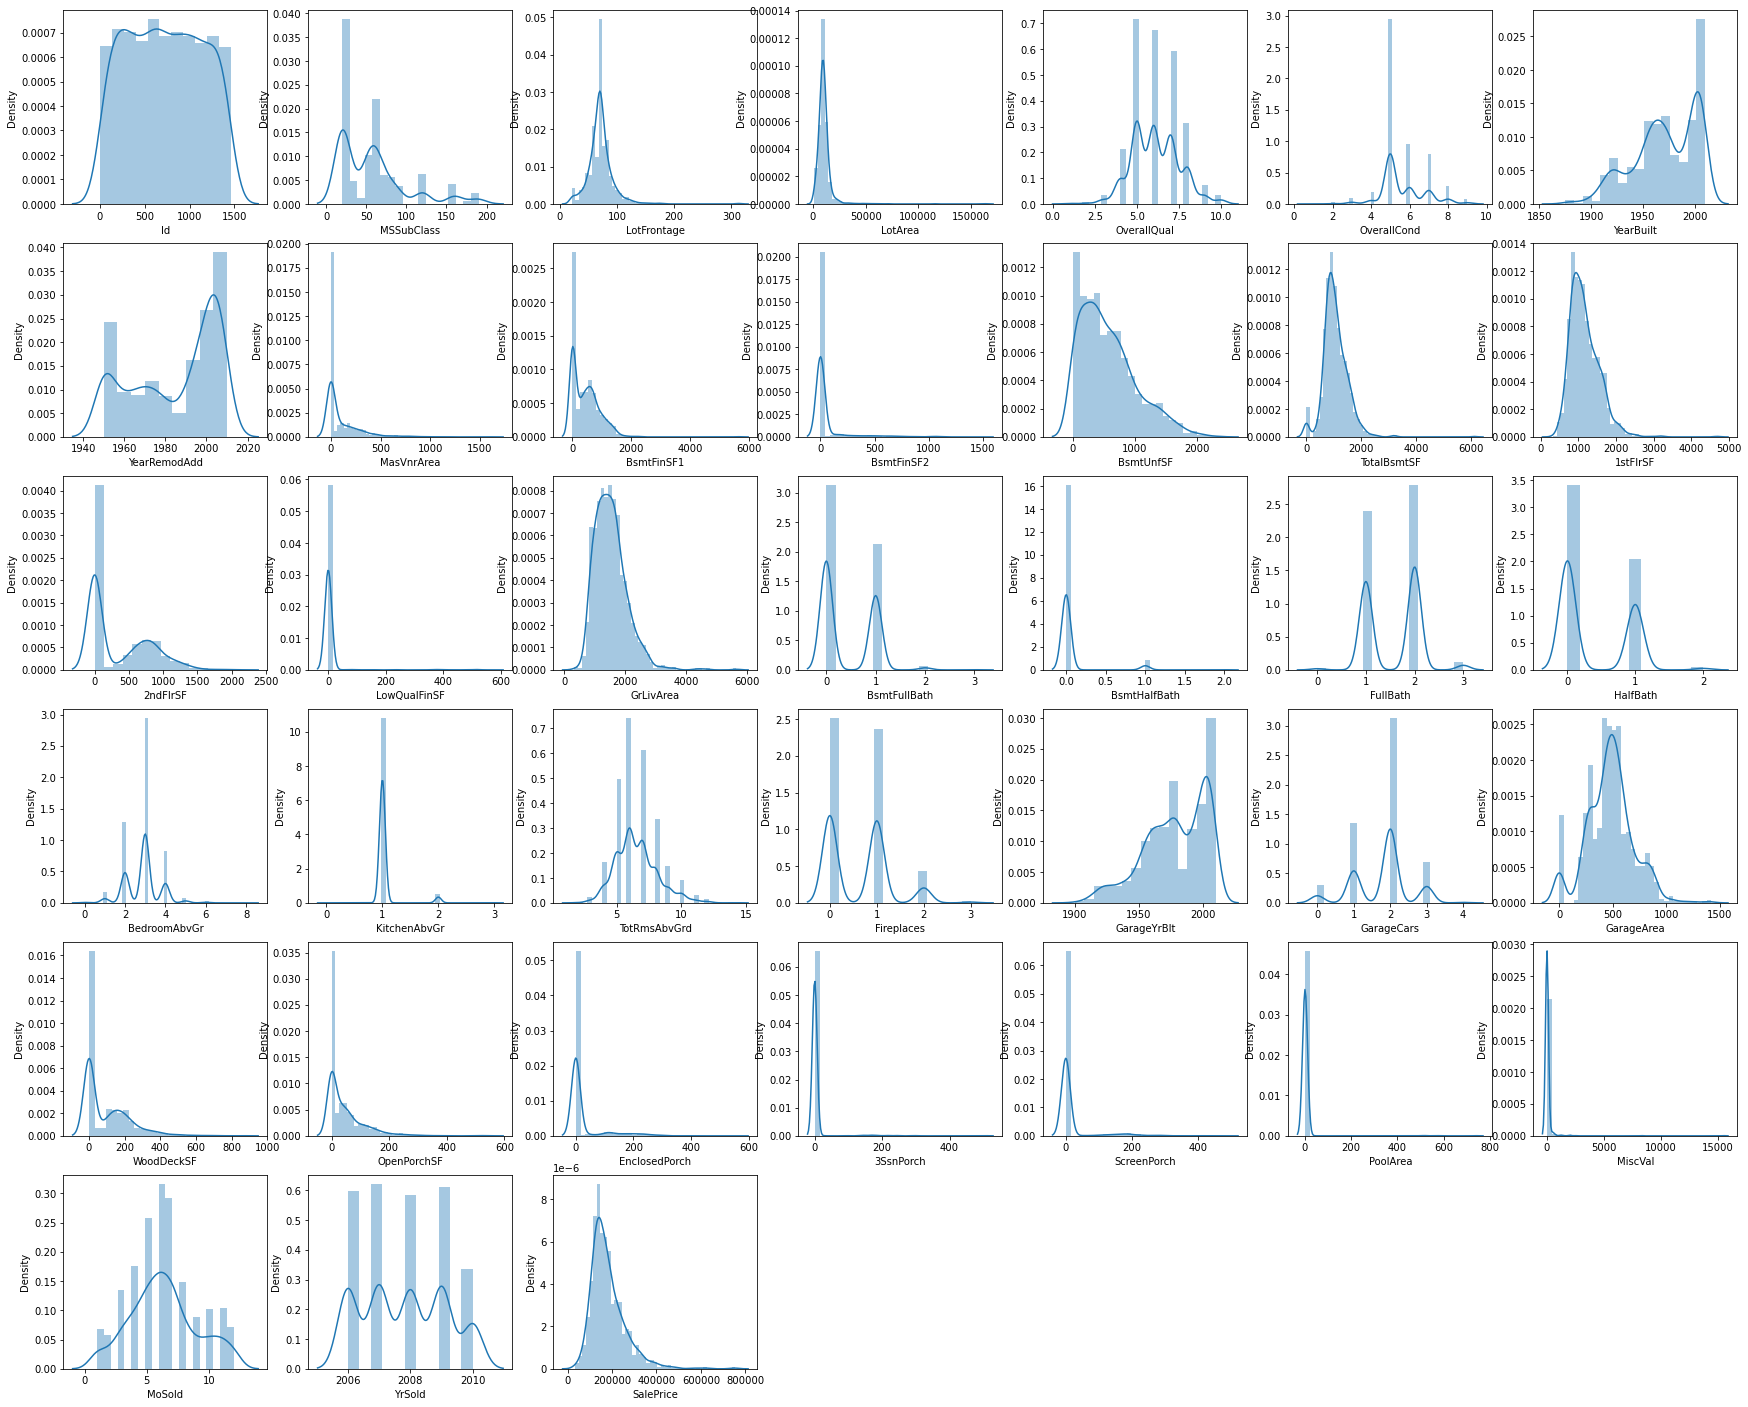

In [32]:
count=1
plt.subplots(figsize=(30,25))
for i in df1.columns:
    if df1[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.distplot(df1[i])
        count+=1

plt.show()

In [33]:
categorical_features=[i for i in df1.columns if df1[i].dtypes=='object']
df1[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,...,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,...,TA,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,COD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


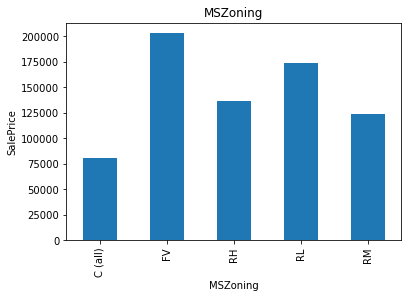

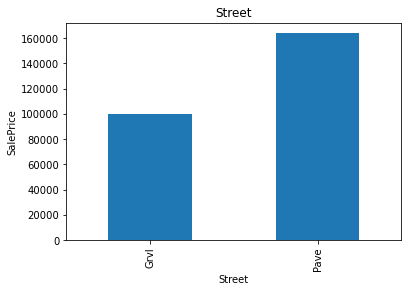

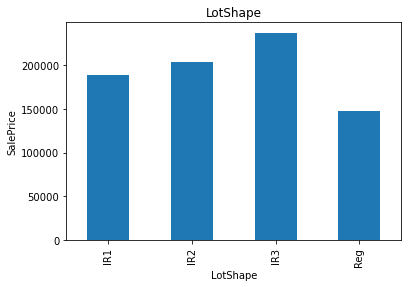

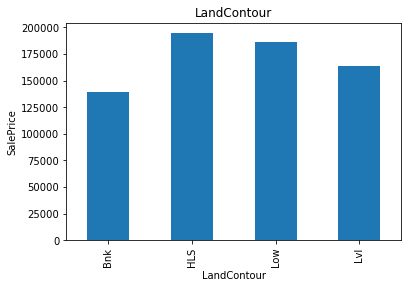

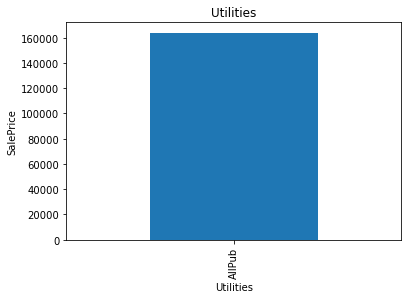

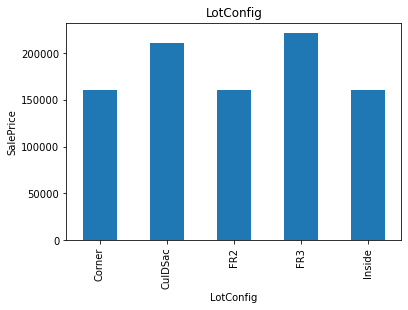

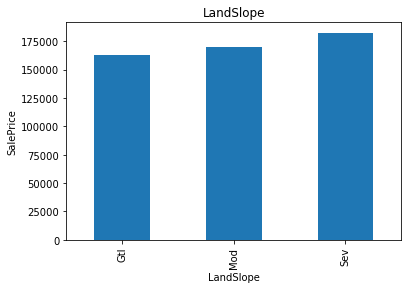

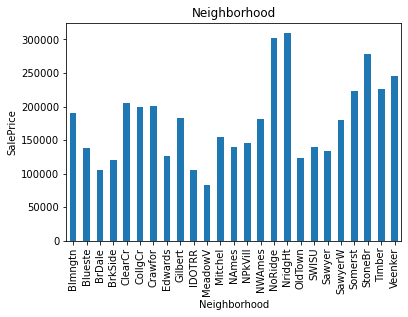

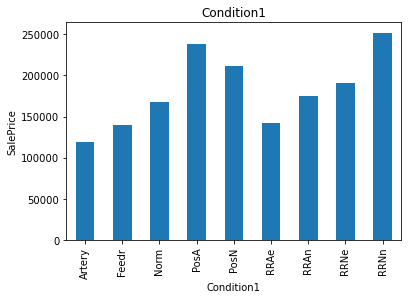

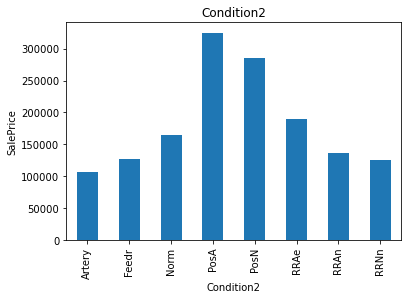

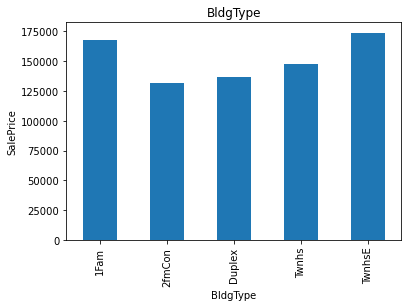

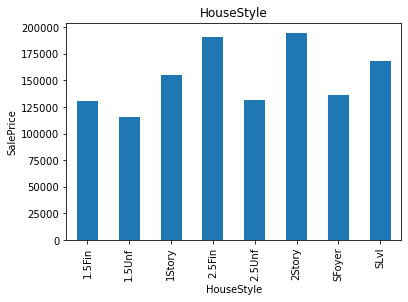

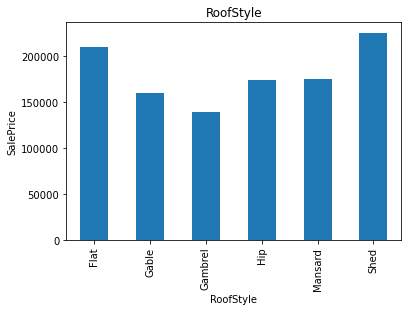

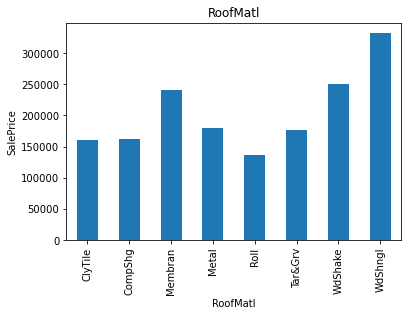

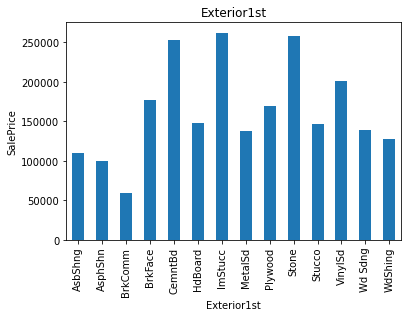

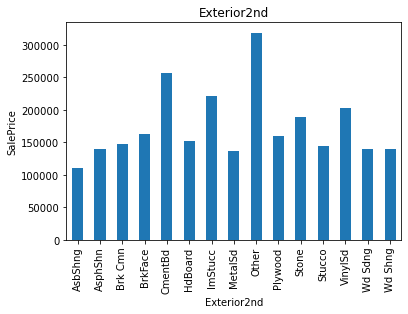

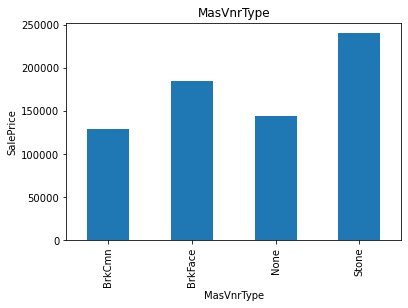

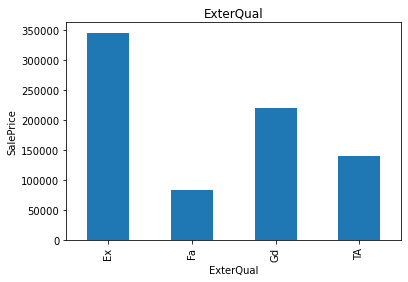

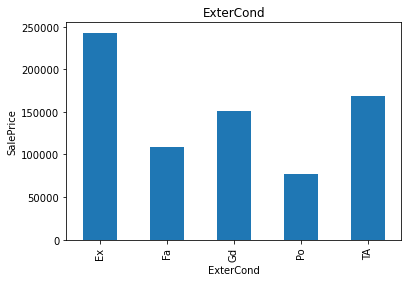

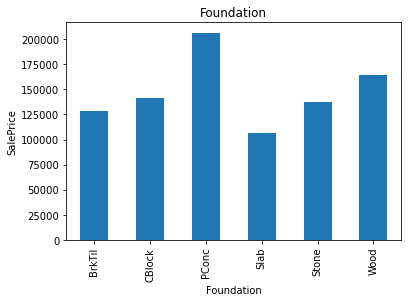

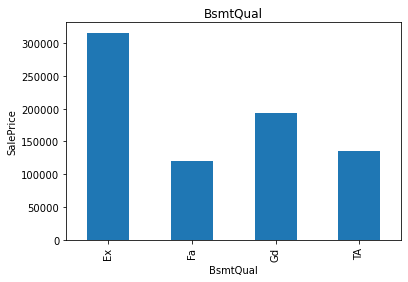

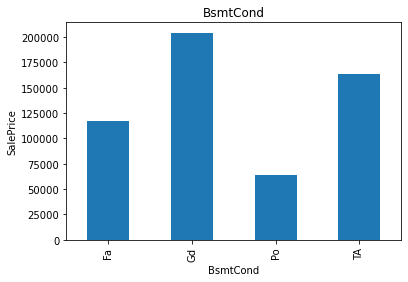

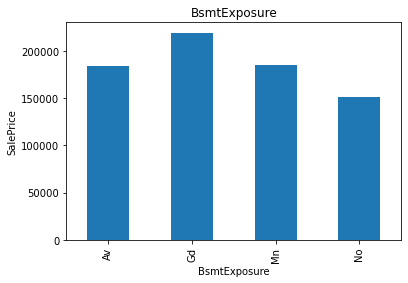

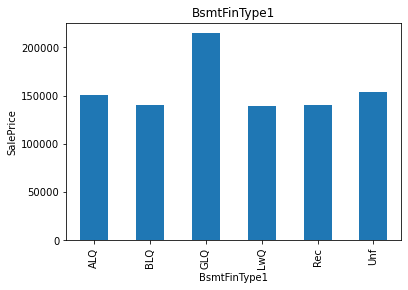

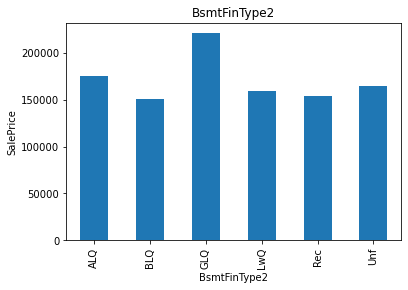

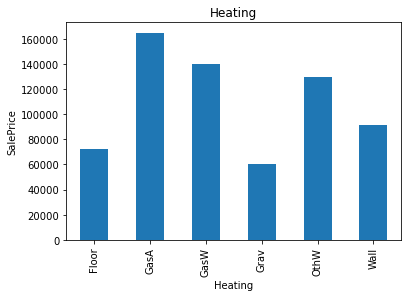

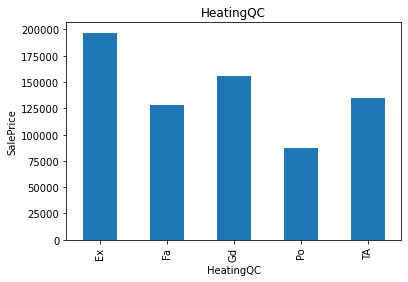

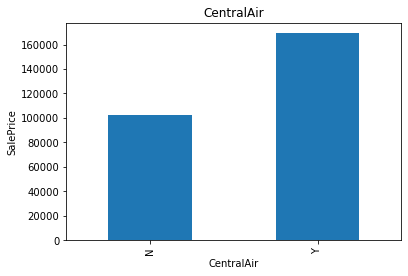

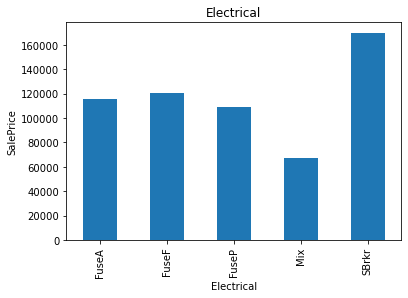

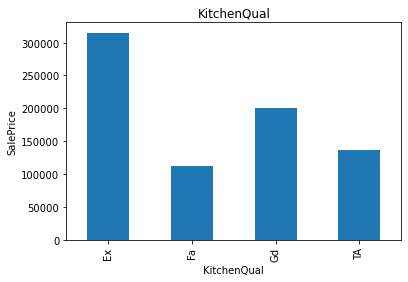

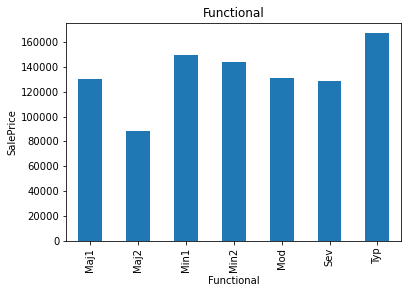

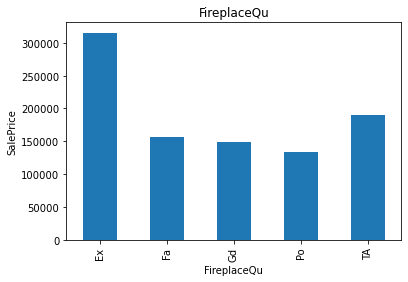

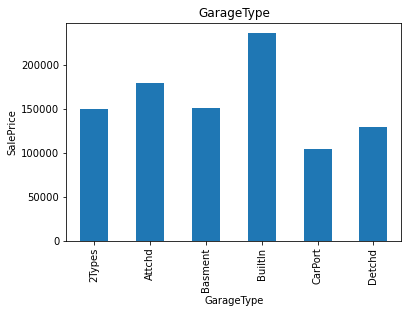

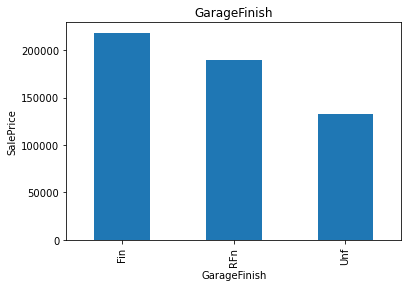

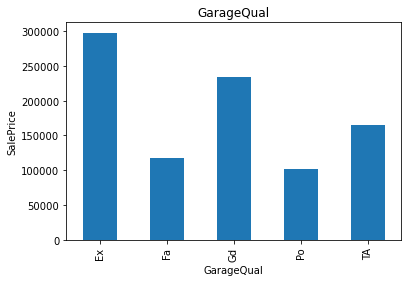

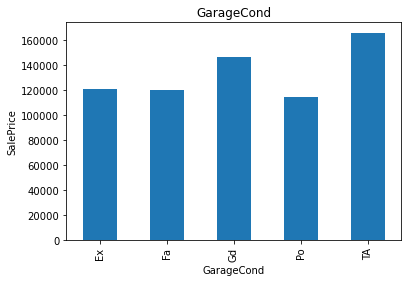

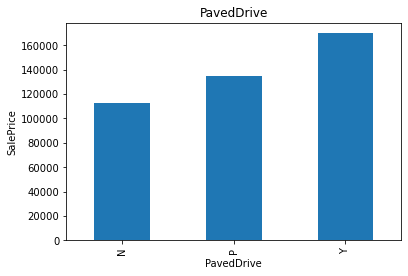

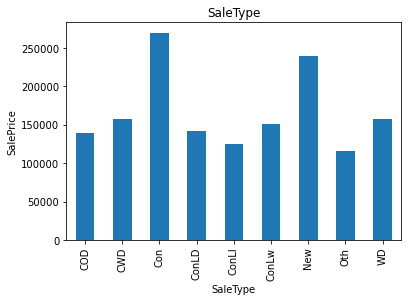

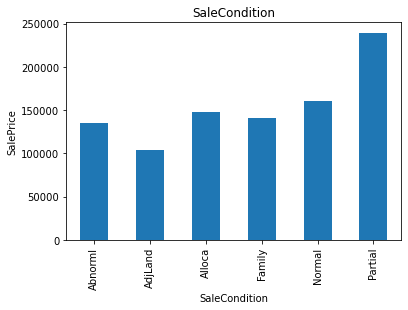

In [34]:
for i in categorical_features:
    data=df1.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

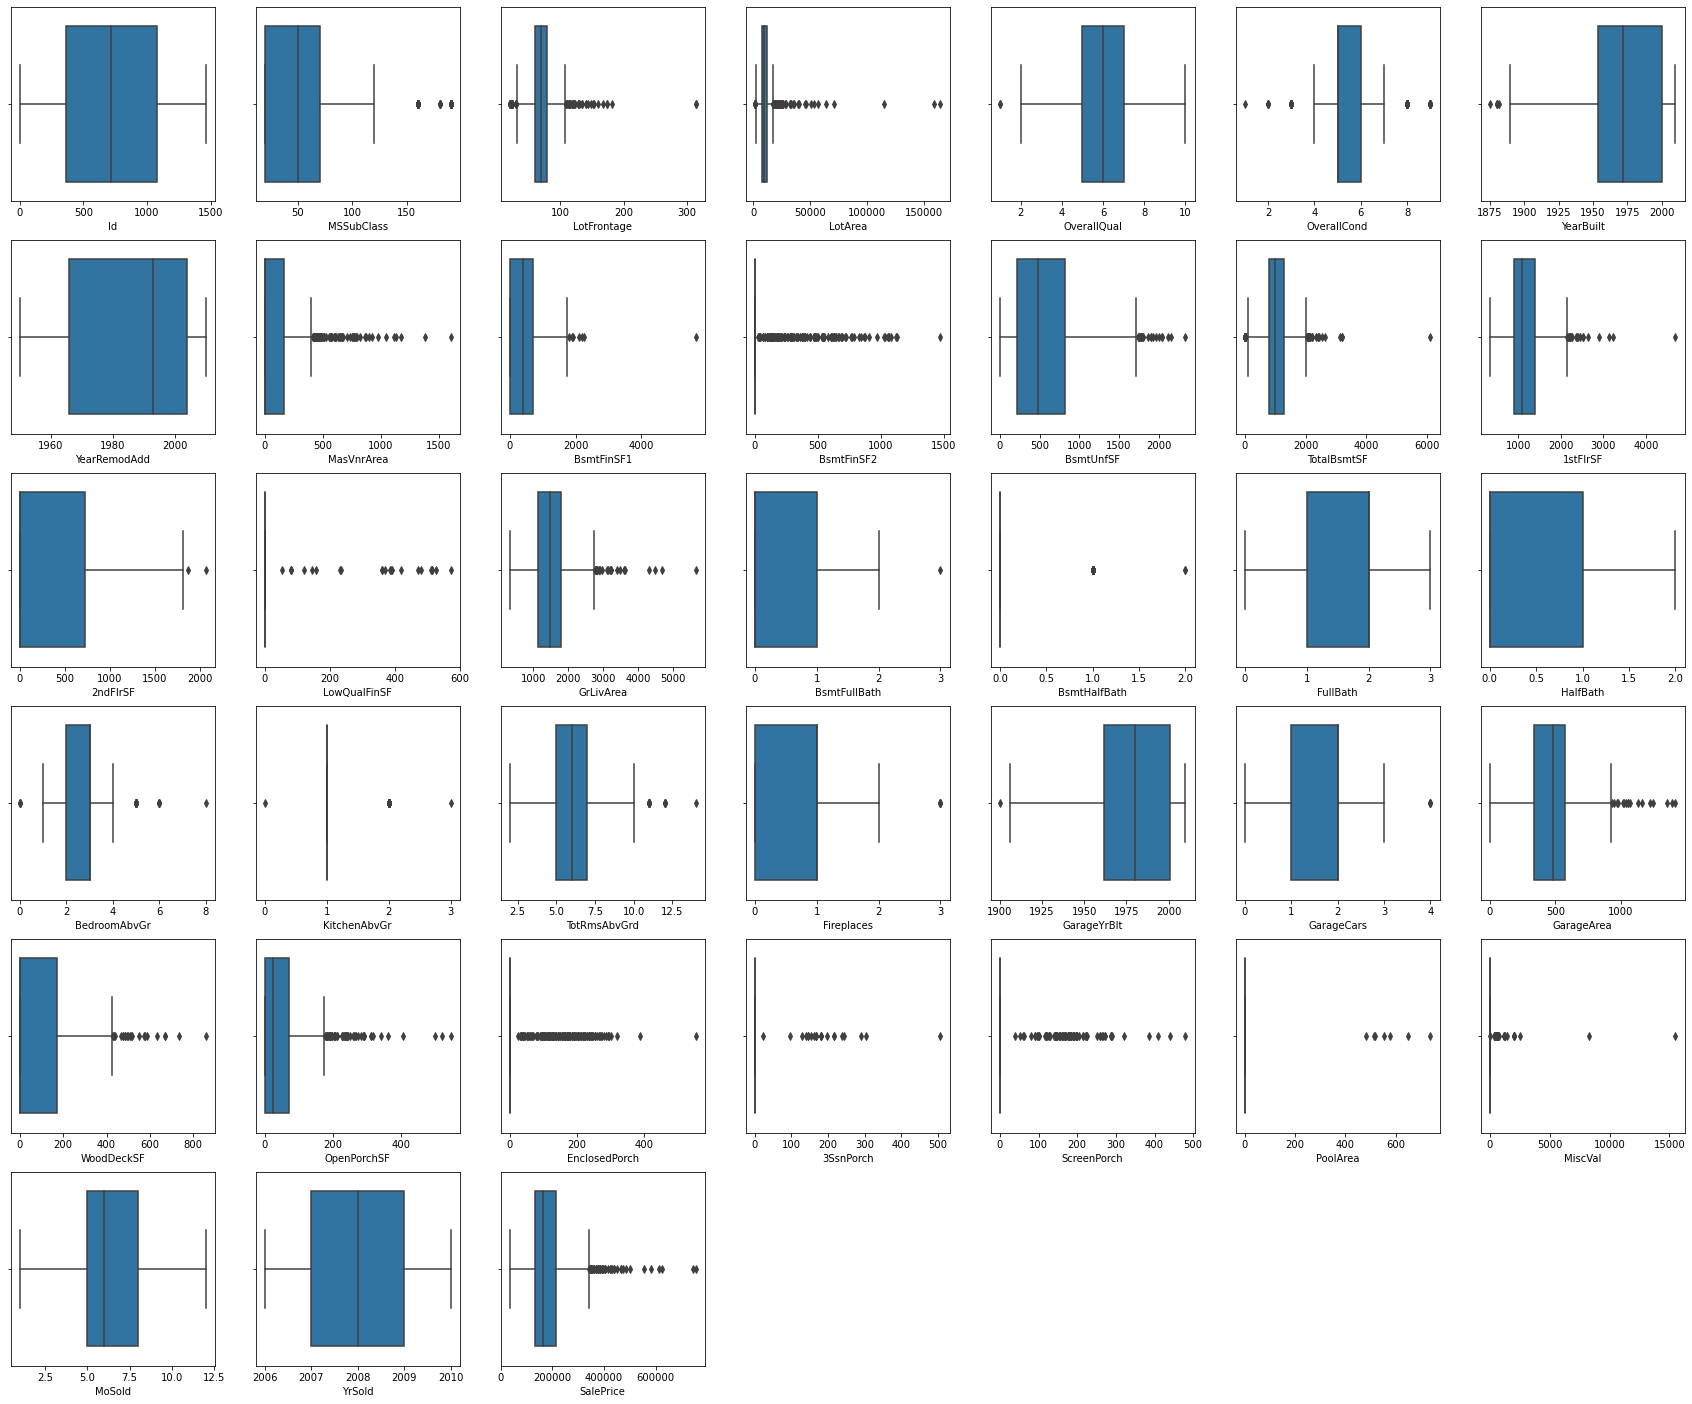

In [35]:
count=1
plt.subplots(figsize=(30,25))
for i in df1.columns:
    if df1[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.boxplot(df1[i])
        count+=1

plt.show()

## 3.Data pre-processing

In [36]:
df1.drop(['Id'], axis = 1,inplace=True)
df2.drop(['Id'], axis = 1,inplace=True)

In [37]:
numerical_feature=[i for i in df1.columns if i not in categorical_features]
print("Numerical Feature Count",len(numerical_feature))

Numerical Feature Count 37


#### i)Removing skewness

In [38]:
df1.skew()

MSSubClass        1.422019
LotFrontage       2.733440
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.674913
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [39]:
for col in df1[numerical_feature].columns:
    df1[col]=np.log1p(df1[col])

In [40]:
df1.skew()

MSSubClass        0.235373
LotFrontage      -0.793980
LotArea          -0.169107
OverallQual      -0.687992
OverallCond      -0.418916
YearBuilt        -0.606245
YearRemodAdd     -0.503168
MasVnrArea        0.518966
BsmtFinSF1       -0.606859
BsmtFinSF2        2.502785
BsmtUnfSF        -2.129882
TotalBsmtSF      -5.146574
1stFlrSF          0.105795
2ndFlrSF          0.289335
LowQualFinSF      7.090715
GrLivArea         0.001448
BsmtFullBath      0.430791
BsmtHalfBath      4.049438
FullBath         -0.369199
HalfBath          0.543681
BedroomAbvGr     -1.153397
KitchenAbvGr      3.678394
TotRmsAbvGrd     -0.071926
Fireplaces        0.188280
GarageYrBlt      -0.698717
GarageCars       -1.393429
GarageArea       -3.508379
WoodDeckSF        0.131075
OpenPorchSF      -0.004279
EnclosedPorch     2.079610
3SsnPorch         7.196594
ScreenPorch       3.104665
PoolArea         12.826713
MiscVal           5.159109
MoSold           -0.910777
YrSold            0.114963
SalePrice         0.073610
d

In [41]:
df2.skew()

MSSubClass        1.358597
LotFrontage       0.499491
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.978463
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.677213
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

In [42]:
numerical_feature=[i for i in df2.columns if i not in categorical_features]
print("Numerical Feature Count",len(numerical_feature))

Numerical Feature Count 36


In [43]:
for col in df2[numerical_feature].columns:
    df2[col]=np.log1p(df2[col])

In [44]:
df2.skew()

MSSubClass        0.301590
LotFrontage      -1.094882
LotArea          -0.016494
OverallQual      -0.125646
OverallCond       0.606771
YearBuilt        -0.785448
YearRemodAdd     -0.543642
MasVnrArea        0.444701
BsmtFinSF1       -0.668665
BsmtFinSF2        2.622732
BsmtUnfSF        -2.454060
TotalBsmtSF      -5.214341
1stFlrSF         -0.013105
2ndFlrSF          0.292337
LowQualFinSF      9.820031
GrLivArea        -0.022042
BsmtFullBath      0.373521
BsmtHalfBath      3.544994
FullBath         -0.499294
HalfBath          0.661487
BedroomAbvGr     -1.515360
KitchenAbvGr      4.548551
TotRmsAbvGrd      0.017772
Fireplaces        0.153695
GarageYrBlt      -0.699775
GarageCars       -1.288968
GarageArea       -3.403913
WoodDeckSF        0.244705
OpenPorchSF      -0.100802
EnclosedPorch     2.258484
3SsnPorch        12.028006
ScreenPorch       3.363599
PoolArea          0.000000
MiscVal           5.232903
MoSold           -0.909981
YrSold            0.017643
dtype: float64

#### ii)Removing outliers

Z Score _ Technique

In [45]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df1[numerical_feature]))
z.shape

(1168, 36)

In [46]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    4,    7,    8,   14,   19,   20,   22,   25,   27,
         32,   32,   33,   34,   34,   38,   39,   39,   42,   43,   47,
         48,   48,   48,   48,   48,   48,   48,   49,   51,   51,   52,
         52,   54,   60,   63,   64,   66,   66,   67,   68,   72,   72,
         72,   73,   74,   74,   76,   76,   82,   86,   91,   93,   93,
         94,   94,   95,   95,   96,   96,   97,   98,   98,  101,  103,
        103,  105,  105,  106,  107,  109,  112,  113,  116,  116,  119,
        119,  119,  120,  120,  123,  123,  124,  127,  127,  127,  133,
        137,  137,  138,  138,  141,  141,  146,  149,  149,  150,  156,
        156,  157,  159,  162,  164,  166,  170,  171,  174,  174,  176,
        178,  180,  180,  181,  182,  184,  184,  187,  190,  191,  192,
        196,  197,  197,  205,  206,  210,  211,  211,  212,  214,  216,
        219,  226,  226,  227,  227,  228,  228,  231,  231,  237,  245,
        247,  247,  249,  249,  249,  253,  257,  

In [47]:
df_new=data[(z<3).all(axis=1)]
print(df1[numerical_feature].shape)
print(df_new.shape)

(1168, 36)
(772, 77)


#### percentage data loss

In [48]:
loss_percent=(1168-803)/1168*100
print(loss_percent)

31.25


###### IF WE PERFORM OUTLIER REMOVEL THE DATA LOSS WILL BE HIGH SO NOT PREFORMING OUTLIER REMOVAL TECHNIQUE

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features:
  df1[i]=le.fit_transform(df1[i])

In [50]:
categorical_features=[i for i in df2.columns if df2[i].dtypes=='O']
df2[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,Ex,Attchd,RFn,TA,TA,Y,COD,Abnorml
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Fa,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,...,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,WD,Normal


In [51]:
le = LabelEncoder()
for i in categorical_features:
  df2[i]=le.fit_transform(df2[i])

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   float64
 1   MSZoning       1168 non-null   int32  
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   float64
 4   Street         1168 non-null   int32  
 5   LotShape       1168 non-null   int32  
 6   LandContour    1168 non-null   int32  
 7   Utilities      1168 non-null   int32  
 8   LotConfig      1168 non-null   int32  
 9   LandSlope      1168 non-null   int32  
 10  Neighborhood   1168 non-null   int32  
 11  Condition1     1168 non-null   int32  
 12  Condition2     1168 non-null   int32  
 13  BldgType       1168 non-null   int32  
 14  HouseStyle     1168 non-null   int32  
 15  OverallQual    1168 non-null   float64
 16  OverallCond    1168 non-null   float64
 17  YearBuilt      1168 non-null   float64
 18  YearRemo

## 4.Feature Engineering

In [53]:
x=df1.drop(columns=['SalePrice'],axis=1)
y=df1['SalePrice']

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
X=pd.DataFrame(sc_x,columns=x.columns)

In [55]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(X)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [57]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 48 is 0.921768284429249


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=48)

## 5.Model construction

### 1.LinearRegression

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [60]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.883698026309843


In [61]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  0.08755197195731042
Mean Squared Error:  0.012712522979371475
Root Mean Squared Error:  0.11274982474208763
Explained Variance Score:  0.9218198222757136
r2_score: 0.921768284429249


### 2.RandomForestRegressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9811131921098327


In [63]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  0.10036402432685654
Mean Squared Error:  0.0199687063204292
Root Mean Squared Error:  0.14131067305914724
Explained Variance Score:  0.878581596975157
r2_score: 0.8771143890390111


### 3.DecisionTreeRegressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [65]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  0.14492756756427871
Mean Squared Error:  0.042908498381006153
Root Mean Squared Error:  0.20714366604124335
Explained Variance Score:  0.7359943810572049
r2_score: 0.7359449854007762


### 4.SVR

In [66]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.8639244509050528


In [67]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  0.11865487321009272
Mean Squared Error:  0.027071438482631303
Root Mean Squared Error:  0.1645340040314807
Explained Variance Score:  0.8346822125358819
r2_score: 0.8334048183117617


### 5.GradientBoostingRegressor

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9669533782621488


In [69]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  0.08977022535951591
Mean Squared Error:  0.015268781639892629
Root Mean Squared Error:  0.12356691159000709
Explained Variance Score:  0.9068219365900744
r2_score: 0.9060373000463955


#### After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the  best model choosen for hyper parameter tuning are   GradientBoostingRegressor,RandomForestRegressor.

## 6.Hyper parameter tuning

### GradientBoostingRegressor

In [70]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV
parameter = {"loss":['ls', 'lad', 'huber', 'quantile'],
             "criterion":['friedman_mse', 'mse', 'mae']}
GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [71]:
GBR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile']})

In [72]:
GBR.best_params_

{'criterion': 'friedman_mse', 'loss': 'huber'}

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor(criterion='friedman_mse',loss='huber')
GBR.fit(x_train,y_train)
GBR_final=GBR.predict(x_test)

In [74]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

Mean Absolute Error:  0.09254705809797661
Mean Squared Error:  0.017361233604325524
Root Mean Squared Error:  0.13176203400192912
Explained Variance Score:  0.8940629407615017
r2_score: 0.8931605400835932


### RandomForestRegressor

In [75]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [76]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)


In [77]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [78]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [79]:
rf=RandomForestRegressor(criterion='mse',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9813881193493948


In [80]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

Mean Absolute Error:  0.10107498186511273
Mean Squared Error:  0.020514769033933584
Root Mean Squared Error:  0.14322977705049178
Explained Variance Score:  0.8748016272589669
r2_score: 0.8737539685342861


##### THE BEST MODEL AFTER HYPER PARAMETER TUNING IS GradientBoostingRegressor 

## 7.FINAL MODEL

In [81]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))


FINAL MODEL
-----------------------------------------
Mean Absolute Error:  0.09254705809797661
Mean Squared Error:  0.017361233604325524
Root Mean Squared Error:  0.13176203400192912
Explained Variance Score:  0.8940629407615017
r2_score: 0.8931605400835932


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

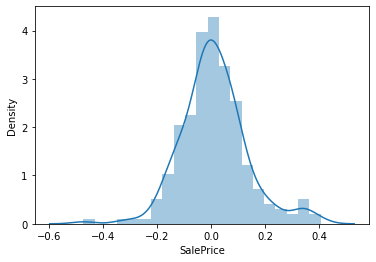

In [82]:
sns.distplot(GBR_PRED-y_test)

Text(0.5, 1.0, 'Linear regression')

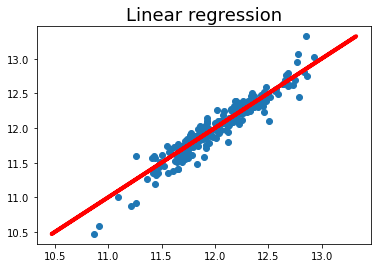

In [83]:
plt.scatter(GBR_PRED,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')
plt.title('Linear regression',fontsize=18)

### 8.SAVING THE MODEL

In [84]:
import joblib
joblib.dump(GBR,'Housing_Project.pkl')

['Housing_Project.pkl']

In [85]:
df2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3.044522,2,4.465908,9.558035,1,0,1,0,0,0,...,3.951244,0.000000,0.0,0.0,0.0,0.000000,2.079442,7.604894,5,2
1,4.795791,2,4.189655,8.668196,1,0,3,0,1,0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.197225,7.605890,0,0
2,3.044522,2,4.189655,9.379154,1,3,3,0,4,0,...,5.023881,0.000000,0.0,0.0,0.0,0.000000,1.945910,7.605890,5,2
3,4.262680,2,4.330733,9.392745,1,3,0,0,4,0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.079442,7.605890,5,2
4,4.110874,2,4.465908,9.588708,1,0,3,0,1,0,...,2.944439,0.000000,0.0,0.0,0.0,0.000000,0.693147,7.605392,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.044522,2,4.369448,9.230829,1,3,3,0,4,0,...,4.605170,0.000000,0.0,0.0,0.0,0.000000,2.397895,7.605392,5,2
288,3.044522,2,4.060443,9.131946,1,1,3,0,4,0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.605392,5,2
289,3.044522,2,4.189655,9.327412,1,0,3,0,1,0,...,0.000000,0.000000,0.0,0.0,0.0,6.552508,1.386294,7.606387,5,2
290,3.931826,3,3.931826,8.517393,1,3,3,0,0,0,...,3.218876,3.610918,0.0,0.0,0.0,0.000000,2.397895,7.604396,5,2


In [86]:
sc=StandardScaler()
sc_x=sc.fit_transform(df2)
x=pd.DataFrame(sc_x,columns=df2.columns)

In [87]:
model=joblib.load('Housing_Project.pkl')

### predict on test.csv file

In [88]:
import sys
nums= model.predict(x)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[10.9097898  10.73681531 10.75220875 10.73144007 10.81330083 11.01277006
 11.00602456 10.77311609 10.72948197 11.00602456 11.00780691 10.70353134
 10.61567592 10.79761645 10.78850952 10.81721299 10.60028249 10.60028249
 10.64230296 10.73681531 11.23297754 10.72766126 10.71892477 11.00620949
 10.62020071 10.60028249 10.75332933 10.71892477 10.72702336 11.07785549
 11.02924127 10.63356646 10.75220875 10.74526086 10.8339205  10.76007484
 10.67150633 11.00448642 10.74821671 10.72766126 10.97969511 10.79790739
 10.76094524 10.63356646 10.64518109 11.0839631  10.59453264 11.00027471
 10.73681531 10.9097898  10.59453264 10.74030318 10.99574992 10.59453264
 10.81330083 10.83102293 11.09899877 10.76094524 10.99822278 10.80456434
 11.01277006 10.74235867 10.71892477 11.02038597 11.11688931 11.00448642
 10.63910982 10.61242318 10.6040613  10.62377452 10.76094524 10.73587562
 10.70965889 10.62541849 10.70353134 10.76094524 10.82252255 10.75157085
 10.82216394 10.72766126 10.76094524 10.5878757  10